In [1]:
# Standard libraries
import numpy as np

# Deep learning tools
from torch.utils.data import DataLoader
import torchvision.transforms as T

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Dataset
from coco_detection_dataset import COCODataset

In [ ]:
# Define transformations
transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create dataset
dataset = COCODataset(
    root_dir='coco_train/data', 
    annotation_file='coco_train/labels.json',
    transform=transform
)

# Handle variable sized data transposing it
def collate_fn(batch):
    return tuple(zip(*batch))

# Create dataloader
dataloader = DataLoader(
    dataset, 
    batch_size=4, 
    shuffle=True, 
    collate_fn=collate_fn
)

In [3]:
# Visualization function
def show_sample(img, target):
    # Convert tensor to numpy and denormalize
    img_np = img.permute(1, 2, 0).numpy()
    img_np = img_np * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
    img_np = np.clip(img_np, 0, 1)
    
    # Create figure
    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.imshow(img_np)
    
    # Draw bounding boxes
    for box, label in zip(target['boxes'], target['labels']):
        x1, y1, x2, y2 = box.numpy()
        label_name = dataset.get_category_name(label.item())
        
        # Rectangle
        rect = patches.Rectangle(
            (x1, y1), x2-x1, y2-y1, 
            linewidth=2, 
            edgecolor='red', 
            facecolor='none'
        )
        ax.add_patch(rect)
        
        # Label text
        ax.text(
            x1, y1-5, 
            label_name, 
            color='white', 
            fontsize=12,
            weight='bold',
            backgroundcolor='red'
        )
    
    plt.title("COCO Object Detection Sample", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Dataset summary:
- Total images: 140
- Categories: 73
- Category names: ['airplane', 'apple', 'backpack', 'banana', 'baseball bat']...

Batch info:
- Batch size: 4

Sample details:
- Image shape: torch.Size([3, 427, 640])
- Objects detected: 4
- Labels: ['bed', 'bed', 'clock', 'remote']

Displaying annotated image:


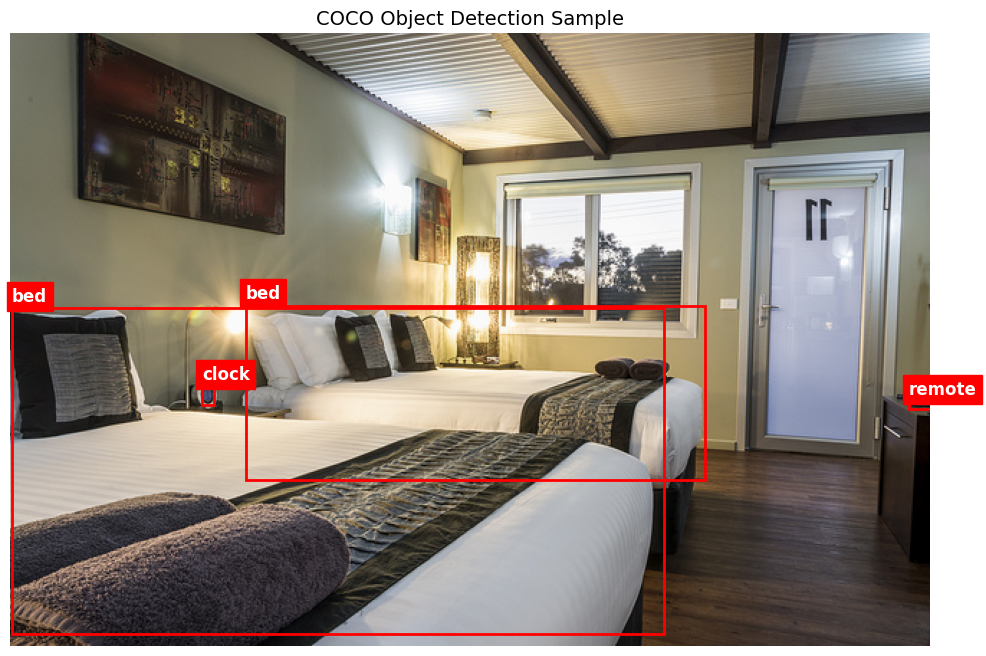

In [5]:
# Print dataset info
print(f"Dataset summary:")
print(f"- Total images: {len(dataset)}")
print(f"- Categories: {len(dataset.id_to_label)}")
print(f"- Category names: {list(dataset.id_to_label.values())[:5]}...")

# Get a batch
batch = next(iter(dataloader))
images, targets = batch
print(f"\nBatch info:")
print(f"- Batch size: {len(images)}")

# Check sample
img, target = images[0], targets[0]
print(f"\nSample details:")
print(f"- Image shape: {img.shape}")
print(f"- Objects detected: {len(target['boxes'])}")
print(f"- Labels: {[dataset.get_category_name(label) for label in target['labels']]}")

# Show the sample image with annotations
print("\nDisplaying annotated image:")
show_sample(img=img, target=target)